<a href="https://colab.research.google.com/github/Mariamng/Learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment Title: Introduction to Data Analysis with Python Pandas

Objective: In this assignment, you will familiarize yourself with Python Pandas, a powerful library for data manipulation and analysis. You will use the Titanic dataset to perform exploratory data analysis (EDA) and create a visualization using Matplotlib pyplot.

Instructions:

Dataset Acquisition:

Obtain the Titanic dataset. You can download it from reputable sources such as Kaggle (https://www.kaggle.com/c/titanic/data) or use datasets available directly through Python libraries.
Exploratory Data Analysis (EDA):

Load the Titanic dataset into a Pandas DataFrame.
Use Pandas methods to explore and understand the dataset:
Display the first few rows to get an overview of the data structure.
Check the dimensions of the dataset (number of rows and columns).
Identify missing values and decide on strategies for handling them.
Compute basic statistics (e.g., mean, median, min, max) for numerical columns.
Analyze categorical variables (e.g., value counts).
Data Visualization:

Choose one column of the dataset that interests you
Use Matplotlib pyplot to create a meaningful visualization:
Select an appropriate plot type (e.g., bar chart, histogram, pie chart).
Label axes, add a title.
Ensure the visualization is clear, informative, and visually appealing. smile
Submission:

You can include code snippets, comments explaining your thought process
Submit your completed assignment

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
titanic_df = pd.read_csv("/content/train.csv")
titanic_df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
rows, columns = titanic_df.shape
print(f'Number of rows is {rows}, number of columns is {columns}')

Number of rows is 891, number of columns is 12


In [12]:
female_passengers = titanic_df.loc[titanic_df['Sex'] == 'female']
print(len(female_passengers))

314


In [13]:
male_passengers = titanic_df.loc[titanic_df['Sex'] == 'male']
print(len(male_passengers))

577


In [16]:
titanic_df['Age'].min()


0.42

In [8]:
titanic_df['Age'].max()


80.0

In [9]:
titanic_df['Age'].mean()

29.69911764705882

In [10]:
age_counts = titanic_df['Age'].value_counts()

print(age_counts)

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64


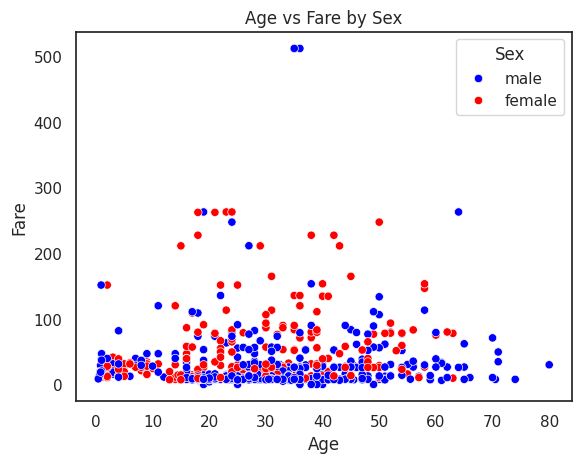

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=titanic_df, x="Age", y="Fare", hue="Sex", palette={"female": "red", "male": "blue"})

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare by Sex")
plt.legend(title="Sex")

plt.show()

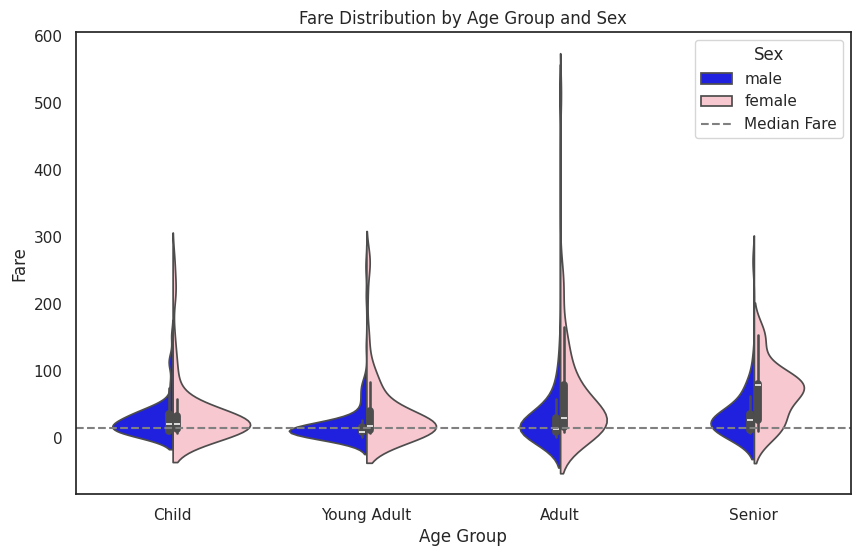

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for age groups
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 18, 30, 50, 80], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="AgeGroup", y="Fare", hue="Sex", data=titanic_df, split=True, palette={"female": "pink", "male": "blue"})

# Add a horizontal line for the median fare
plt.axhline(titanic_df['Fare'].median(), color='gray', linestyle='--', label='Median Fare')

# Customize the plot
plt.xlabel("Age Group")
plt.ylabel("Fare")
plt.title("Fare Distribution by Age Group and Sex")
plt.legend(title="Sex")

# Show the plot
plt.show()

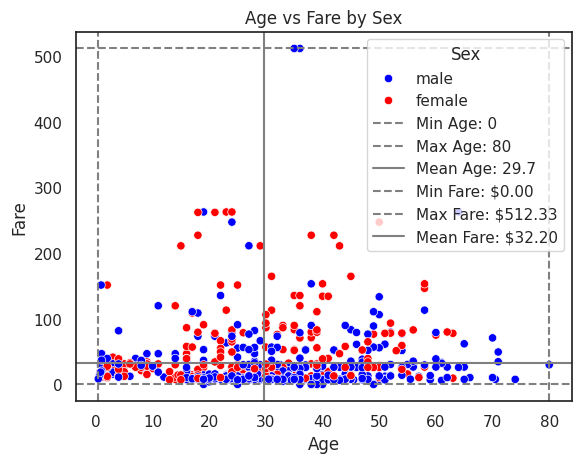

In [40]:

import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot
sns.scatterplot(data=titanic_df, x="Age", y="Fare", hue="Sex", palette={"female": "red", "male": "blue"})

# Add annotations for min, max, and mean ages
min_age = titanic_df['Age'].min()
max_age = titanic_df['Age'].max()
mean_age = titanic_df['Age'].mean()
plt.axvline(x=min_age, color='gray', linestyle='--', label=f'Min Age: {min_age:.0f}')
plt.axvline(x=max_age, color='gray', linestyle='--', label=f'Max Age: {max_age:.0f}')
plt.axvline(x=mean_age, color='gray', linestyle='-', label=f'Mean Age: {mean_age:.1f}')

# Add annotations for min, max, and mean fares
min_fare = titanic_df['Fare'].min()
max_fare = titanic_df['Fare'].max()
mean_fare = titanic_df['Fare'].mean()
plt.axhline(y=min_fare, color='gray', linestyle='--', label=f'Min Fare: ${min_fare:.2f}')
plt.axhline(y=max_fare, color='gray', linestyle='--', label=f'Max Fare: ${max_fare:.2f}')
plt.axhline(y=mean_fare, color='gray', linestyle='-', label=f'Mean Fare: ${mean_fare:.2f}')

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare by Sex")
plt.legend(title="Sex")

plt.show()